# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
sns.set_palette('viridis')
# %matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescription of Data Containing numerical Values:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Description of Data Containing numerical Values:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+

In [4]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
years = np.array(list(set(df['Year'])))
column_header = df.columns.tolist() # it will make easier to select column for data representation eg 0 for Year
yearly_data = df.groupby('Year') #Data grouped together on the basis of year

def individual_year(year):
    return yearly_data.get_group(year)

aggregated_data = df.groupby('Year').agg('mean')

aggregated_data


,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


In [5]:
# Resetting years as an index and setting as an normal columns
aggregated_data = aggregated_data.reset_index()
aggregated_data

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

#### For the univariate analysis of our climate variables—Global Average Temperature (°C), CO₂ Concentration (ppm), Sea Level Rise (mm), and Arctic Ice Area (million km²)—we implemented a comprehensive visualization strategy. Specifically, we created:

- Histogram Plots to display the frequency distribution of each variable.
- Box Plots to highlight central tendencies and potential outliers.
- Line Plots to track trends over time.
- Barcharts to compare values across selected time intervals.
- KDE Plots to provide a smoothed estimate of the data’s probability density.
- Violin Plots to combine the benefits of box plots and density curves.
#### Following these visualizations, we performed a detailed exploratory data analysis (EDA) based on the pictorial representations to extract meaningful insights from the data.

Univariate Analysis for Global Average Temperature (°C) 
 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64 

Creating plots ... 




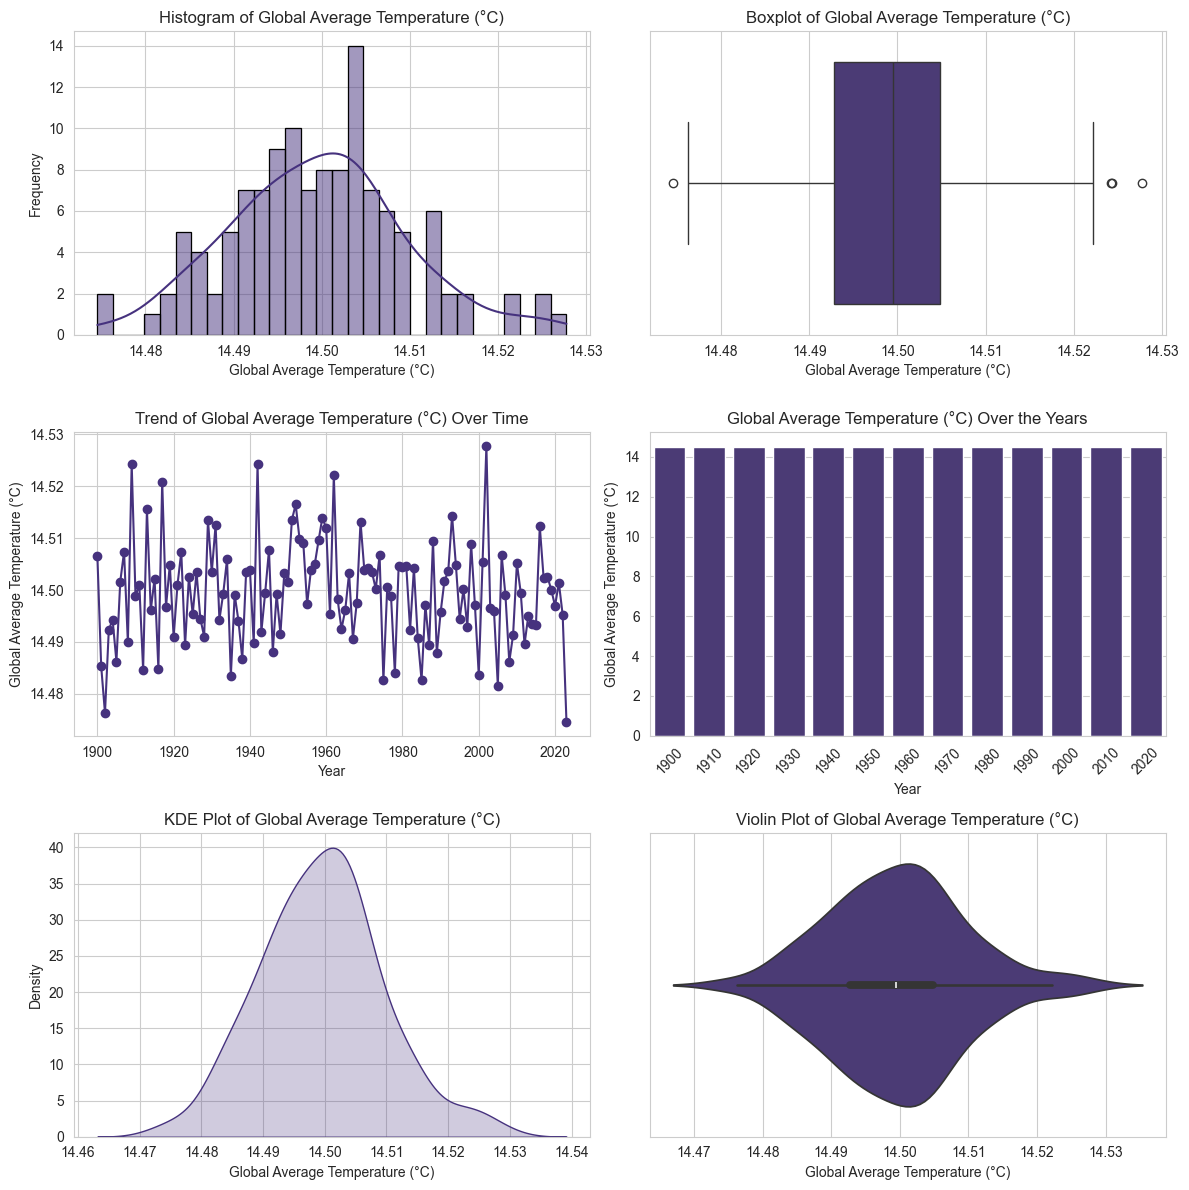

Univariate Analysis for CO2 Concentration (ppm) 
 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64 

Creating plots ... 




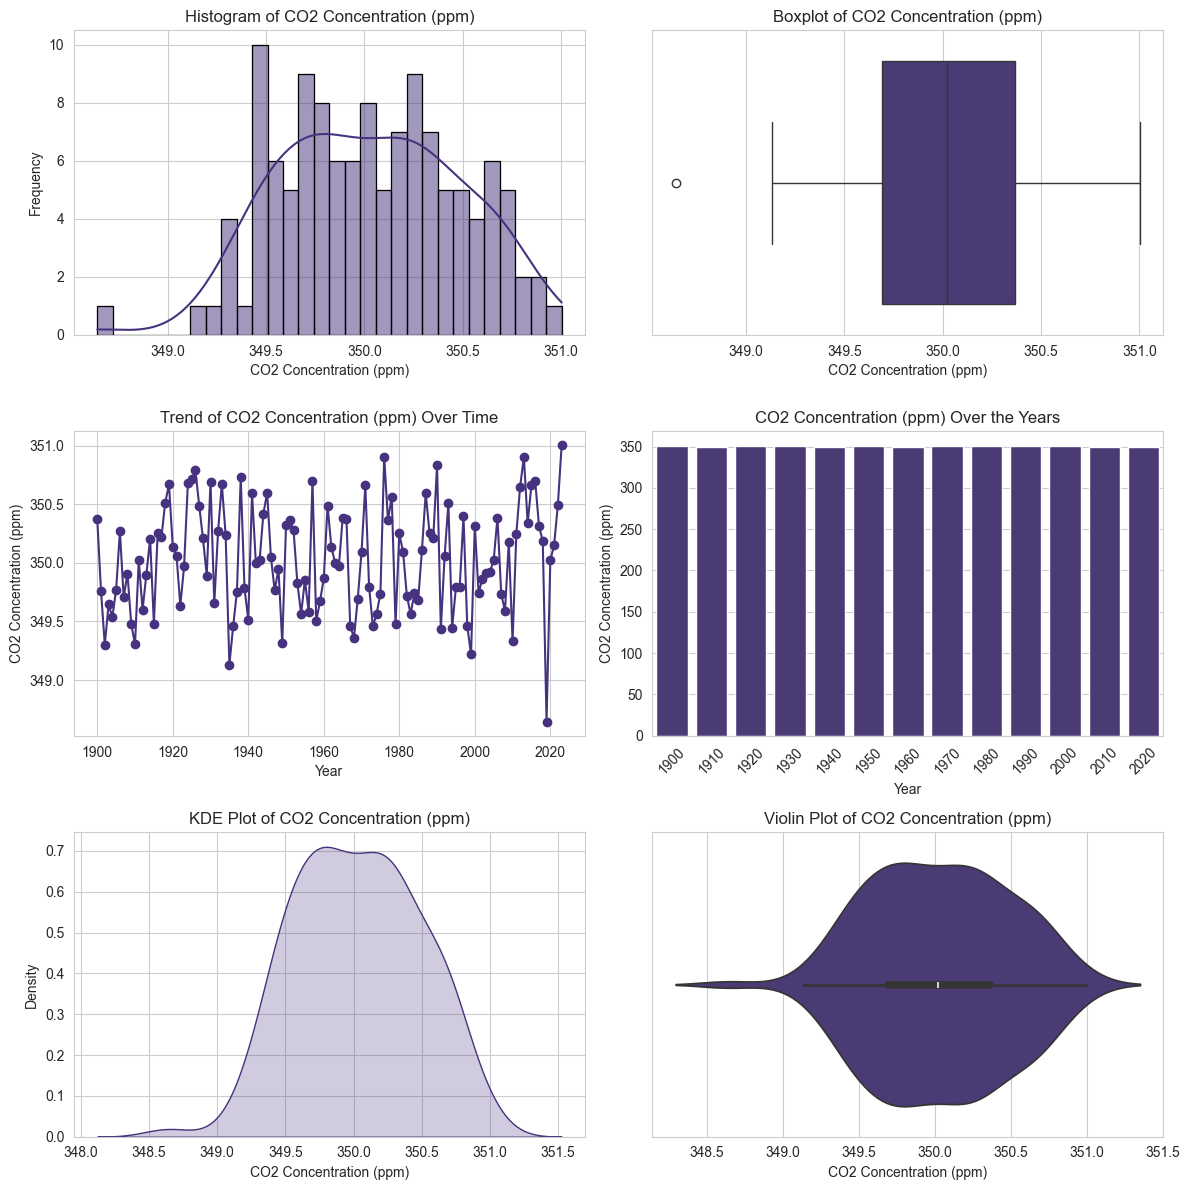

Univariate Analysis for Sea Level Rise (mm) 
 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64 

Creating plots ... 




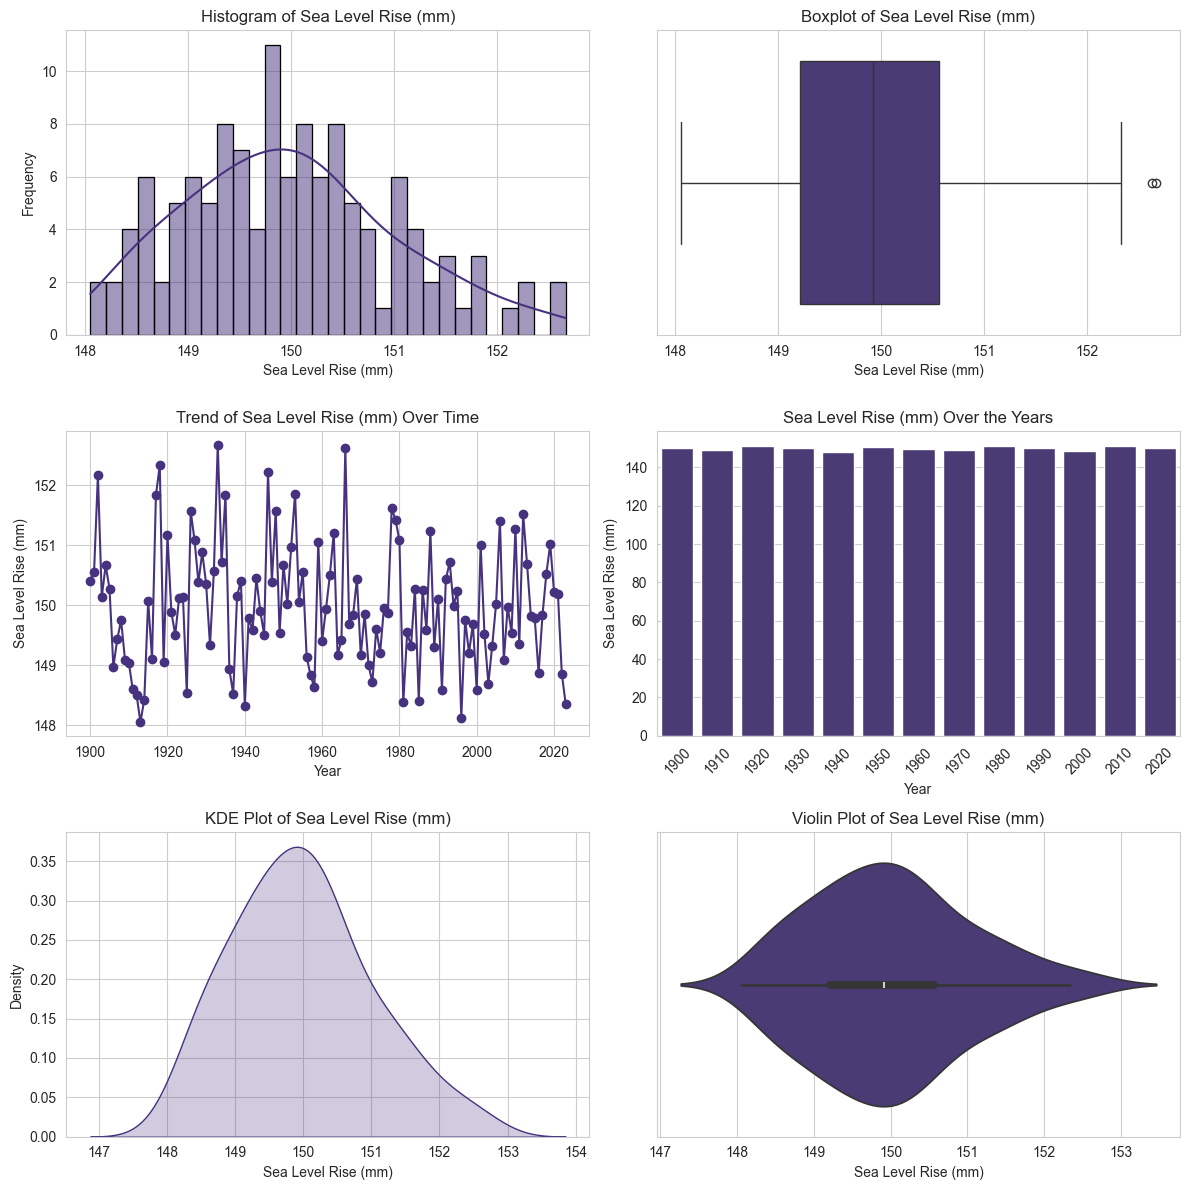

Univariate Analysis for Arctic Ice Area (million km²) 
 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64 

Creating plots ... 




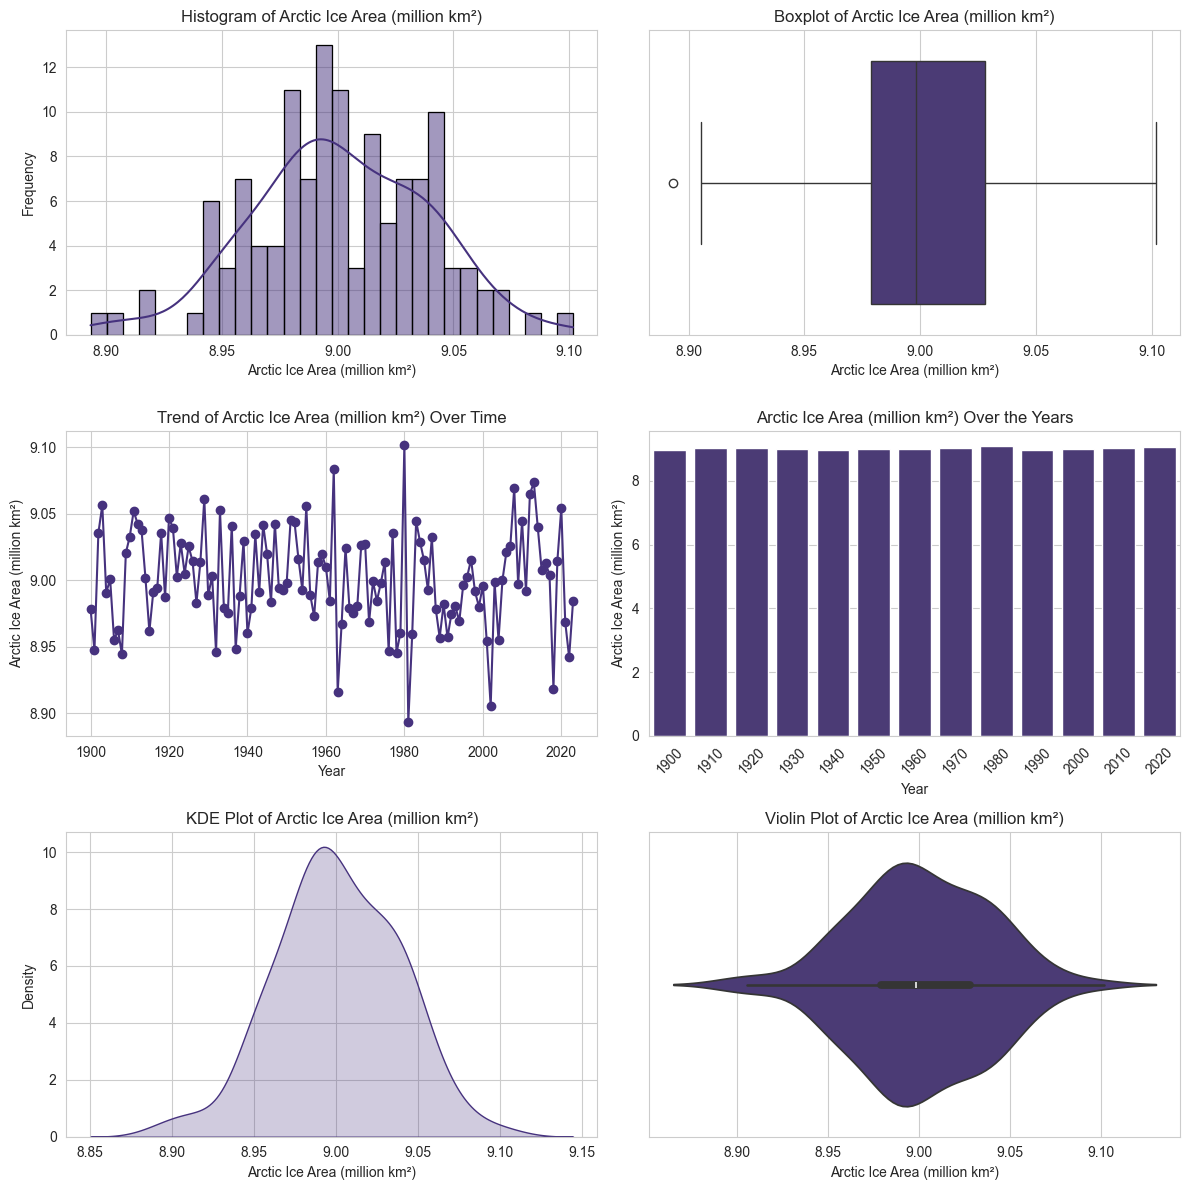

In [6]:
# Function to create the Histplot, Box plot, Line plot, Barcharts, KDE plots and Violin Plot of all the independent variables of the datasets
def univariate_analysis(df):
    for var in df.columns:
        if var != 'Year':
            print(f"Univariate Analysis for {var} \n ")
            print(df[var].describe(), "\n\nCreating plots ... \n\n")

            plt.figure(figsize=(12, 12))  # Adjust figure size

            # 1. Histogram
            plt.subplot(3, 2, 1)
            sns.histplot(data=df, x=var, kde=True, bins=30, edgecolor='black')
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel('Frequency')

            # 2. Box Plot
            plt.subplot(3, 2, 2)
            sns.boxplot(x=df[var], orient='h')
            plt.title(f"Boxplot of {var}")
            plt.xlabel(var)

            # 3. Line Plot
            plt.subplot(3, 2, 3)
            plt.plot(df['Year'], df[var], marker='o', linestyle='-')
            plt.title(f'Trend of {var} Over Time')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.grid(True)

            # 4. Bar Chart (Every 10 Years)
            plt.subplot(3, 2, 4)
            filtered_data = df[df['Year'] % 10 == 0]  # Select every 10th year
            sns.barplot(x=filtered_data['Year'], y=filtered_data[var])
            plt.title(f'{var} Over the Years')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.xticks(rotation=45)

            # 5. KDE Plot (Replaces Displot)
            plt.subplot(3, 2, 5)
            sns.kdeplot(df[var], fill=True)
            plt.title(f'KDE Plot of {var}')
            plt.xlabel(var)
            plt.ylabel('Density')

            # 6. Violin Plot (Better for Distribution Analysis)
            plt.subplot(3, 2, 6)
            sns.violinplot(x=df[var])
            plt.title(f'Violin Plot of {var}')
            plt.xlabel(var)

            # Adjust layout and display all subplots together
            plt.tight_layout()
            plt.show()

univariate_analysis(aggregated_data)

#### Univariate Analysis Conclusion and Insights

- Global Average Temperature
	- Global average temperature appears to be centered around 14.5°C with a relatively narrow spread, as shown by the histogram and KDE plot. The boxplot and violin plot confirm only minor variability, indicating most data points lie within a tight band around the median. From the line chart, there are slight year-to-year fluctuations rather than a pronounced upward or downward trend. The bar chart reinforces this consistency, with values hovering close to 14.5°C across the observed period. Overall, the dataset suggests stable global temperatures within a narrow range, though further analysis over a longer timeframe or with additional climate variables could provide deeper insights


- Co2 concentration
	- The frequncy distribution of Co2 values are clustre near 350 ppm (with a narrow range 349 - 351), this suggests that dataset is tightly centered. Boxplot represents that the median is near 350 ppm and there appear to be no extreme outliers. So the data is quite uniform. Co2 trend over time oscillates slightly but does not show a strong upward or downward trend. The Co2 values remains between 249-351 ppm. The barchart shows that there is little variations between selected years.Violin plot show that the violin is narrow, indicate low variances with center near 350 ppm aligning with other plots.

- Sea Level Rise
	- Sea level rise data is centered around approximately 149–151 mm, with minimal variation indicated by the histogram, KDE, and violin plots. The line plot shows modest year-to-year fluctuations but no strong long-term trend. The boxplot suggests few outliers and a relatively narrow range. Overall, the data points to stable sea levels within this observed period

- Arcti Ice Area
	- Arctic ice area appears to be centered around a relatively narrow range (8.9 - 9.15 million km2), with minimal variation shown by the histogram and KDE plots. The boxplot and violin plot indicate a fairly symmetric distribution, suggesting few extreme outliers. From the line chart, there are mild fluctuations over the observed period, but no dramatic trend is immediately evident. The bar chart likewise shows values clustered near a central level across different years. Overall, the data suggests relatively stable Arctic ice area in this dataset.


## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

#### For the bi-variate analysis of our climate variables—Global Average Temperature (°C), CO₂ Concentration (ppm), Sea Level Rise (mm), and Arctic Ice Area (million km²), we have implemented a comprehensive visualization strategy. Specifically, we created:

- Line Plots - to track trends over time.
- Scatter Plots - to explore relationships between variable pairs.
- Regression Plots - to assess and quantify linear associations.
- Heatmaps/Correlation Matrices - to visualize the interdependencies among the variables.
#### Following these visualizations, we conducted a detailed exploratory data analysis (EDA) based on the pictorial representations to extract key insights and trends.

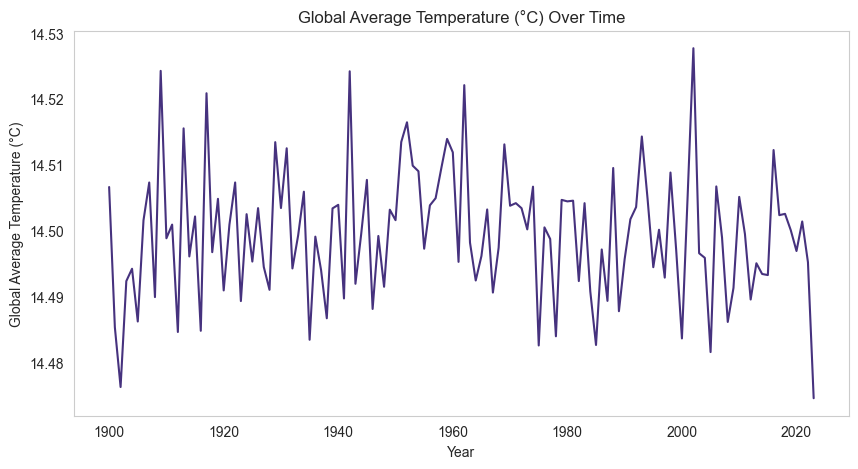

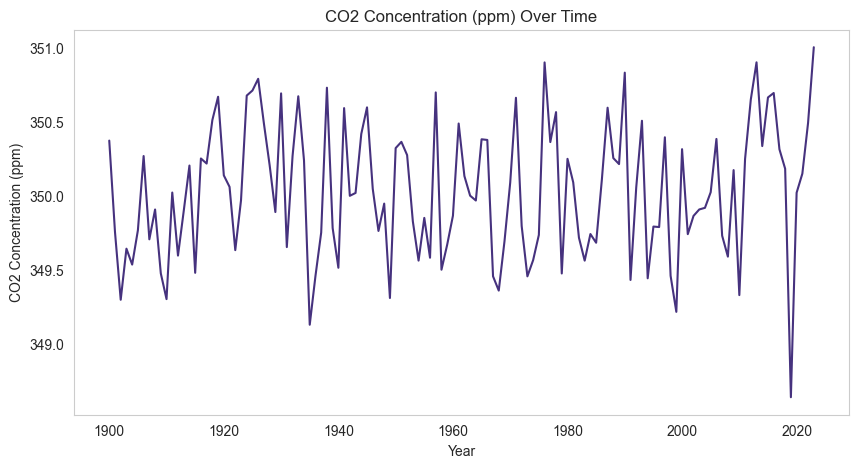

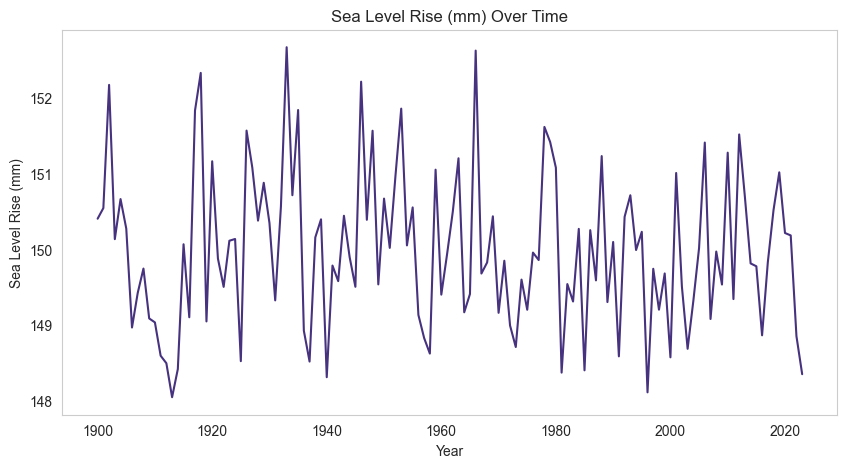

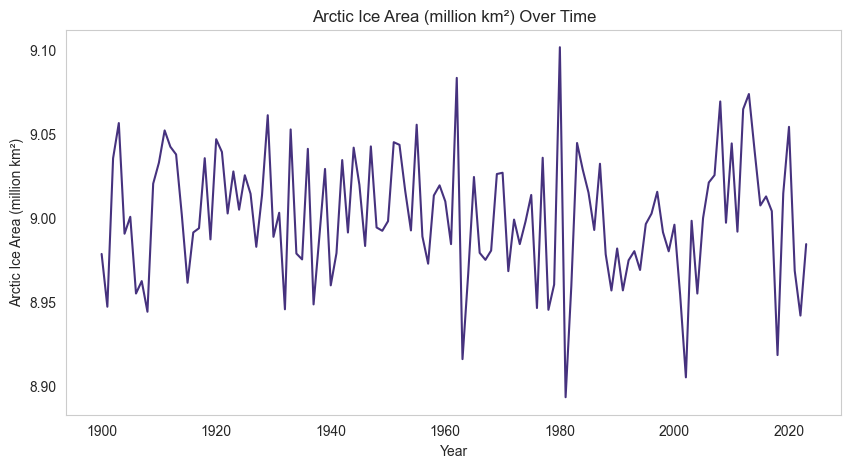

In [7]:
# Function to generate the line plot for all the climate variables
def bivariate_lineplot_analysis(df):
	for var in df.columns:
		if var != 'Year':
			plt.figure(figsize=(10, 5))
			plt.plot(df['Year'], df[var])
			plt.title(f'{var} Over Time')
			plt.xlabel('Year')
			plt.ylabel(var)
			plt.grid(False)
			plt.show()

bivariate_lineplot_analysis(aggregated_data)

#### Bivariate Analysis of different climate variables with respect to the yearly time frame.

- Global Average Temperature
	- From the line chart, we found out that there are slight year-to-year fluctuations rather than a pronounced upward or downward trend. Minimum value 14.4 °C, Maximum Value 14.5 °C

- Co2 concentration
	- The data is quite uniform. Co2 trend over time oscillates slightly but does not show a strong upward or downward trend. The Co2 values remains between 348.6-351 ppm. 

- Sea Level Rise
	- The line plot shows modest year-to-year fluctuations but no strong long-term trend. Minimum value 148.05 mm, Maximum Value 152.6 mm

- Arcti Ice Area
	- It is found out that there are mild fluctuations over the observed period, but no dramatic trend is immediately evident. Max is 9.1 and min is 8.89 million km²


In [8]:
avg_temp = "Global Average Temperature (°C)"
co2_conc = "CO2 Concentration (ppm)"
sea_level_rise = "Sea Level Rise (mm)"
arctic_ice_area = "Arctic Ice Area (million km²)"
year = "Year"

In [9]:
# function to create a scatter plot for bivariate analysis that accepts an axis
def bivariate_scatterplot_analysis(ax, df, xvar, yvar):
    sns.scatterplot(x=xvar, y=yvar, data=df, hue=year, ax=ax)
    ax.set_title(f"Scatter Plot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(False)

# function to create a regression plot that accepts an axis
def bivariate_regplot_analysis(ax, df, xvar, yvar):
    sns.regplot(x=xvar, y=yvar, data=df, ax=ax)
    ax.set_title(f"Regplot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(False)

# function that creates a subplot including both scatter plot and regplot
def bivariate_subplot_analysis(df, xvar, yvar):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    bivariate_scatterplot_analysis(axes[0], df, xvar, yvar)
    bivariate_regplot_analysis(axes[1], df, xvar, yvar)
    plt.tight_layout()
    plt.show()


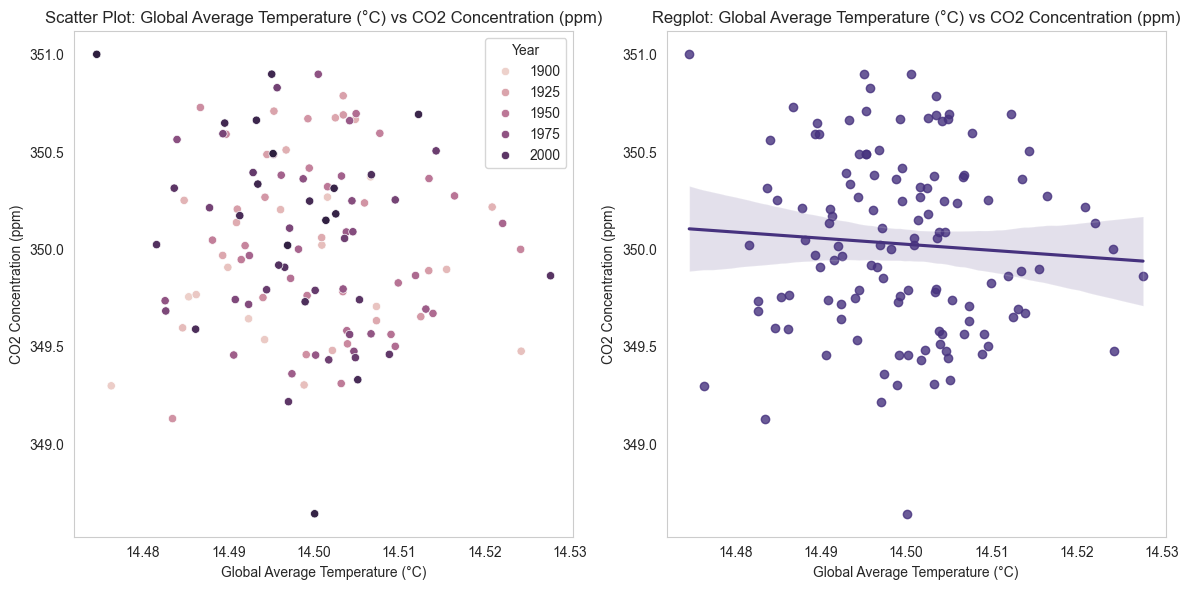

In [10]:
# bivariate analysis of Global average temperature and Co2 concentrations
bivariate_subplot_analysis(aggregated_data,avg_temp,co2_conc)

#### The data points are relatively scattered and it shows that there is a weak negative relationship between global average temperateure and Co2 concentrations. The scatter plot is not able to show the stron pattern and regression plot show a very shallow negative trend.

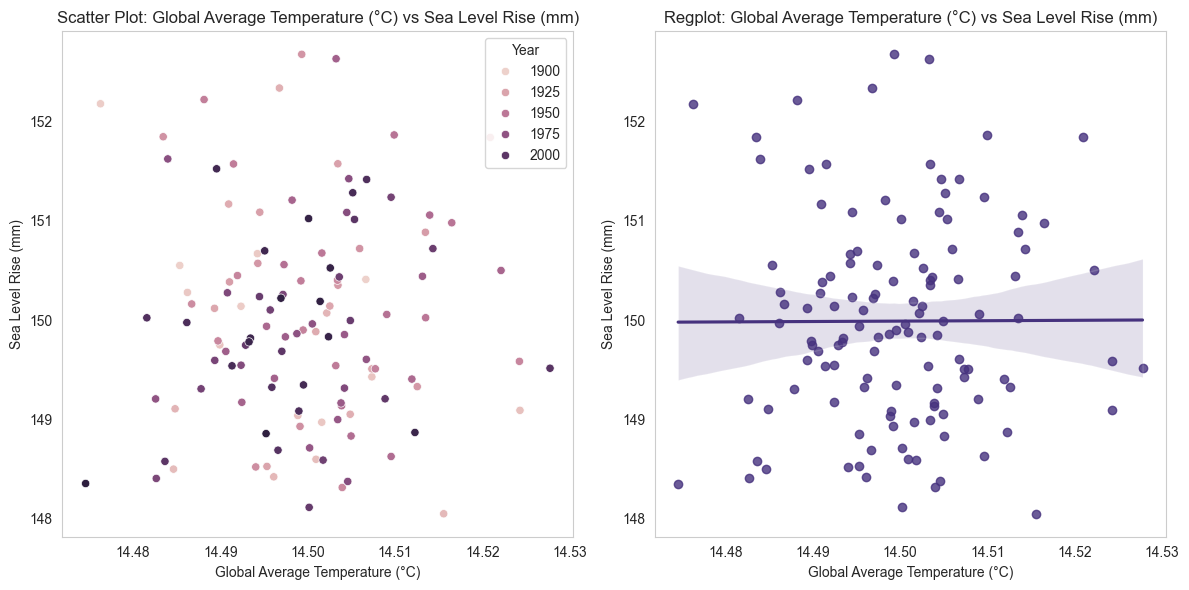

In [11]:
# bivariate analysis of Global average temperature and Sea Level Rise
bivariate_subplot_analysis(aggregated_data,avg_temp,sea_level_rise)

#### Weak linear correlations, it indicates a very weak linear relationship between global average temperature and sea level rise. The regression plot confirms ths with near horizontal line and wide confidence interval. 

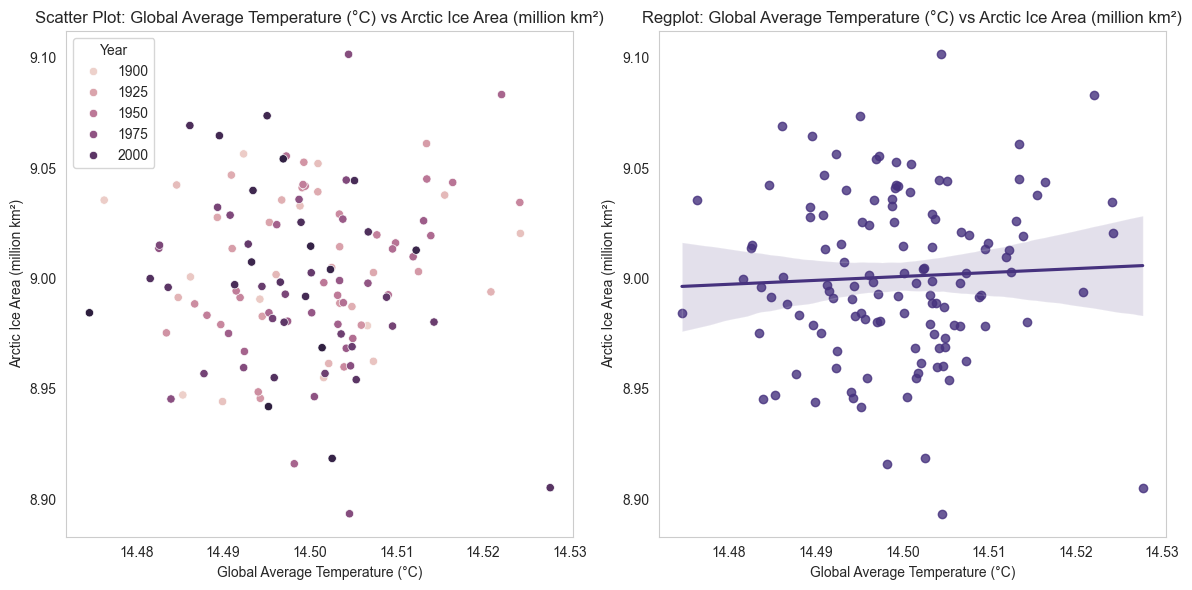

In [12]:
# bivariate analysis of Global average temperature and Arctic Ice Level
bivariate_subplot_analysis(aggregated_data,avg_temp,arctic_ice_area)

#### There is a very weak positive linear relationship between the Global average temperature and the Arctic Ice Level, suggesting minimal correlation within the observed data.

#### 

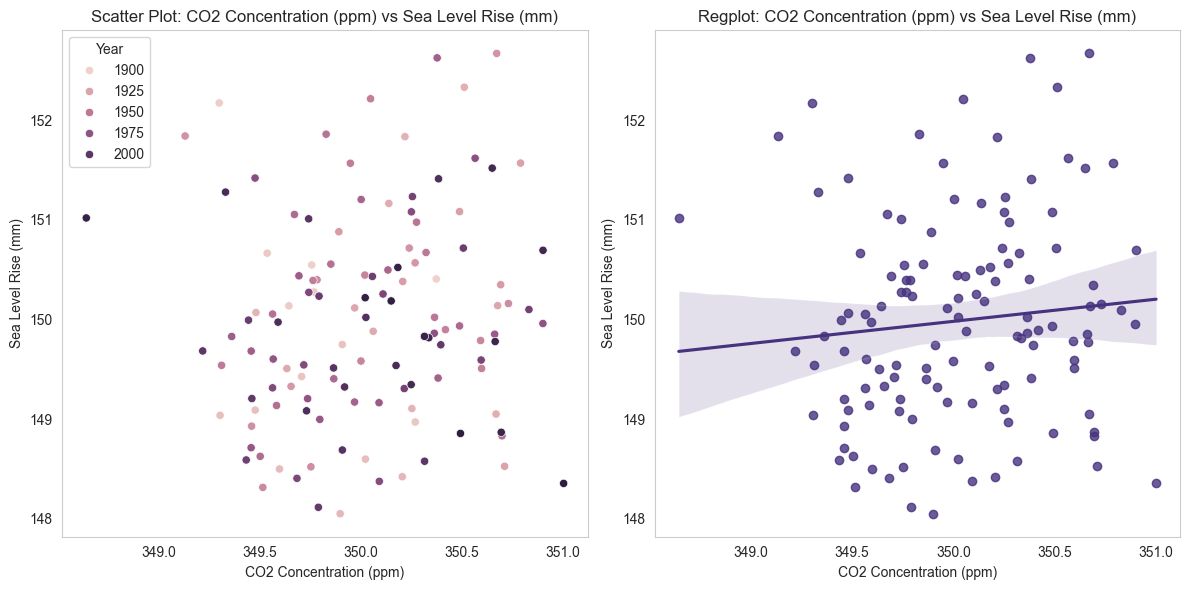

In [13]:
# bivariate analysis of Co2 concentrations and Sea Level Rise
bivariate_subplot_analysis(aggregated_data,co2_conc,sea_level_rise)

#### The visualization shows a weak positive linear relationship between CO2 concentration and sea level rise. While there's a slight upward trend in the regression line, the wide confidence interval and scattered data points suggest other factors are likely more influential.

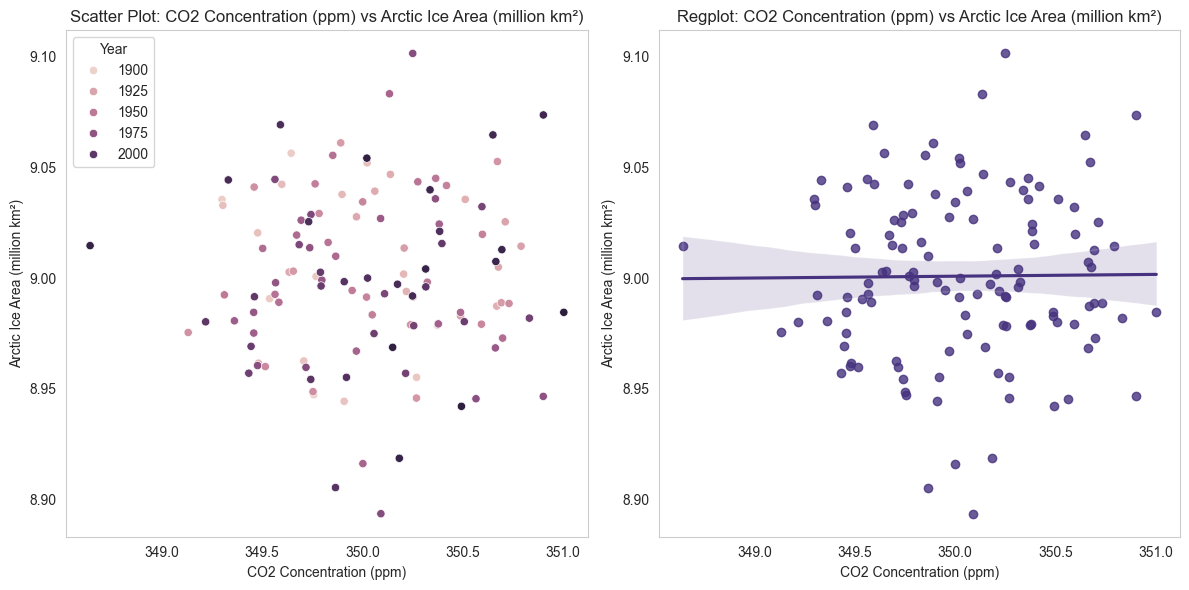

In [14]:
# bivariate analysis of Co2 concentrations and Arctice Ice Level
bivariate_subplot_analysis(aggregated_data,co2_conc,arctic_ice_area)

#### The visualization shows a almost zero linear relationship between CO2 concentration and Arctic ice area. The regression line is nearly flat with a wide confidence interval, suggesting minimal correlation within the observed data range.

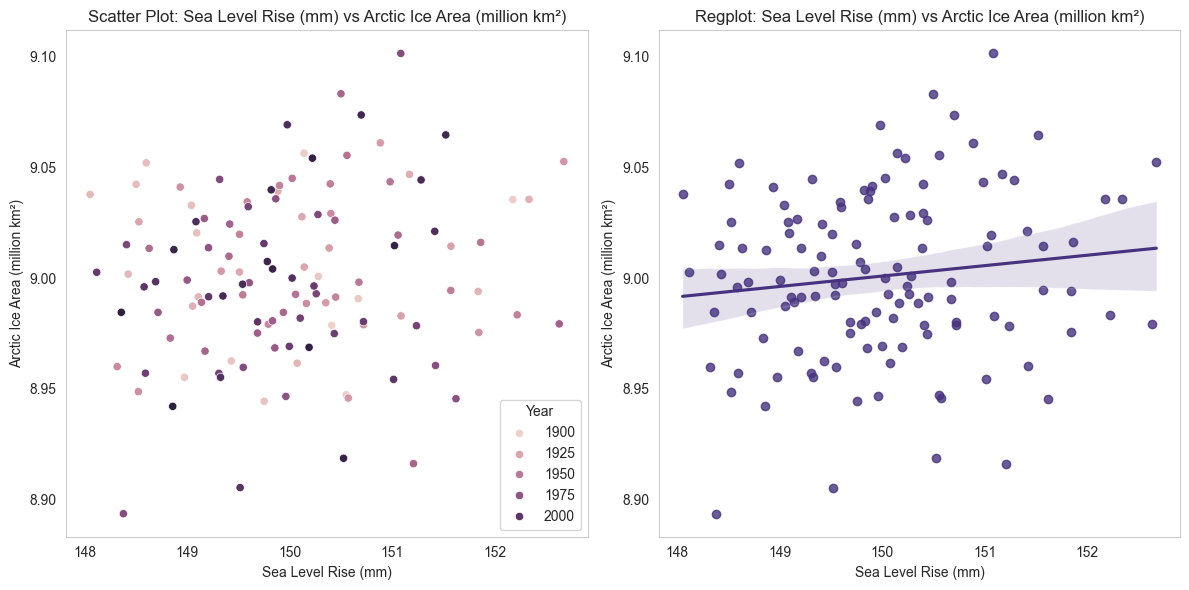

In [15]:
# bivariate analysis of Sea Level Rise and Arctice Ice Level
bivariate_subplot_analysis(aggregated_data,sea_level_rise,arctic_ice_area)

#### The visualization shows a weak positive linear relationship between Arctic Ice area and sea level rise. While there's a slight upward trend in the regression line, the wide confidence interval and scattered data points suggest other factors are likely more influential.

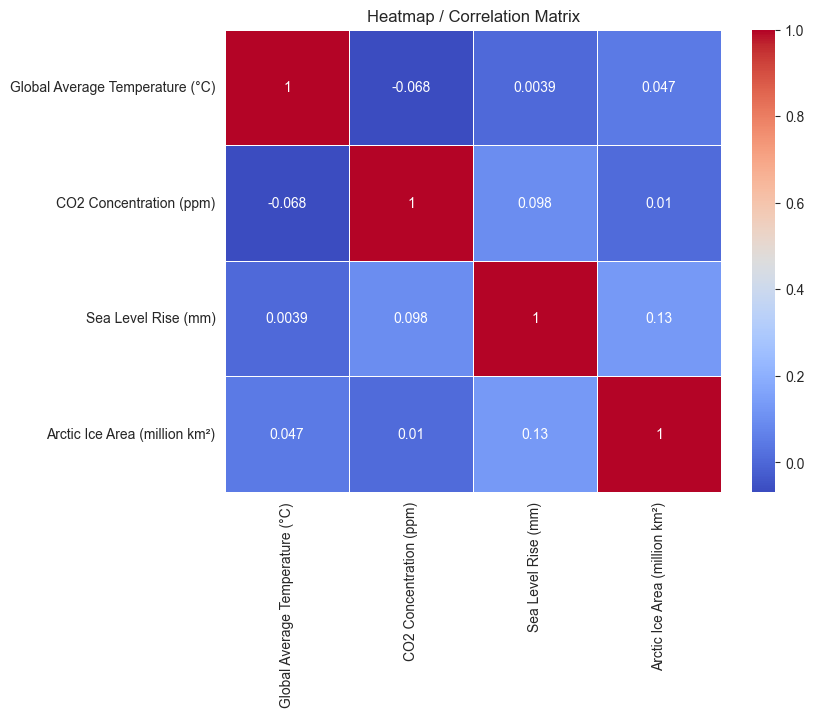

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Global Average Temperature (°C),1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),0.047027,0.009986,0.129528,1.000000


In [16]:

# Heatmap or Correlation matrix
def create_heatmap(df):
	plt.figure(figsize=(8,6))

	corr_matrix = df.corr()

	sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
	plt.title("Heatmap / Correlation Matrix")
	plt.show()

	return corr_matrix

# Drop year from aggregated_data
df_heatmap = aggregated_data.drop(columns=['Year'], errors="ignore")

create_heatmap(df_heatmap)

Our analysis found that the correlation values between Global Average Temperature, CO₂ Concentration, Sea Level Rise, and Arctic Ice Area are all relatively small (close to 0). This suggests weak relationships between the variables, meaning that changes in one do not strongly predict changes in another.

Surprisingly, we observed a weak negative correlation between Global Temperature and CO₂ Concentration. Typically, we expect a positive correlation, as higher CO₂ levels are known to drive temperature increases, but that pattern is not evident in this dataset.

Similarly, there is almost no correlation between Global Temperature and Sea Level Rise, indicating no direct relationship within the dataset. However, CO₂ Concentration and Sea Level Rise show a slight positive correlation, suggesting that rising CO₂ levels might contribute to sea level increase, albeit weakly.

An unexpected weak positive correlation between Sea Level Rise and Arctic Ice Area was also observed. Since melting Arctic ice should contribute to sea level rise, we would normally expect a negative correlation instead.

Lastly, Global Temperature and Arctic Ice Area also show a weak positive correlation, contradicting the expected inverse relationship where higher temperatures typically lead to reduced Arctic ice.

These findings indicate the need for further analysis, considering additional climate factors and potential non-linear relationships.


In [17]:
# Function to create a Violin Plots
def bivariate_violinplot_analysis(df, var):
	plt.figure(figsize=(7,5))
	sns.violinplot(y = df[var])

	# adding features
	plt.title(f"Violin Plot: {var} (1900 - 2023)")
	plt.ylabel(var)
	plt.grid(False)
	plt.xticks(rotation=100)
	plt.show()

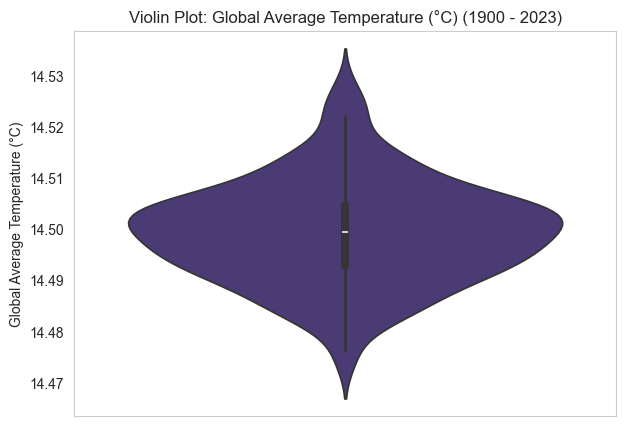

In [18]:
bivariate_violinplot_analysis(aggregated_data,avg_temp)

#### The violin plot shows us how the global average temperature has been distributed over the years from 1900 to 2023. Most of the temperatures are clustered around 14.50°C, with some years being slightly warmer or cooler.  The shape of the plot suggests a roughly normal distribution with some extreme values.

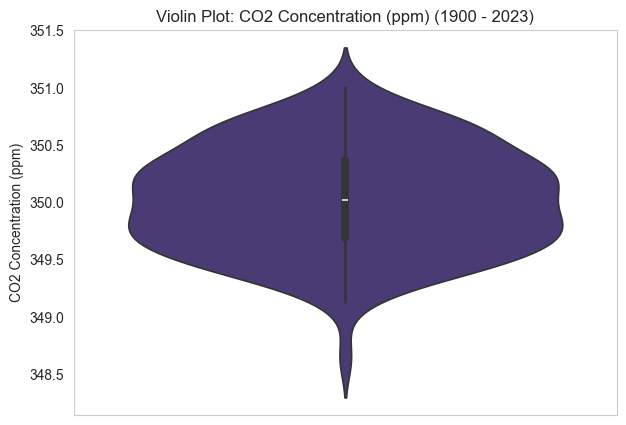

In [19]:
bivariate_violinplot_analysis(aggregated_data,co2_conc)

#### The violin plot shows us how the CO2 concentration has been distributed over the years from 1900 to 2023. Most of the concentrations are clustered around 350 ppm, with some years having slightly higher or lower concentrations.

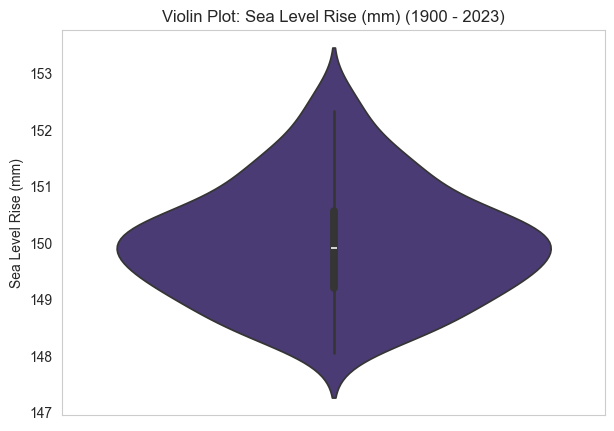

In [20]:
bivariate_violinplot_analysis(aggregated_data,sea_level_rise)

#### This violin plot shows how much sea level has risen (in millimeters) from 1900 to 2023.  Most of the time, the rise was around 150mm, with some years a bit higher or lower. The shape suggests a pretty normal spread of rises, with a few extreme years.

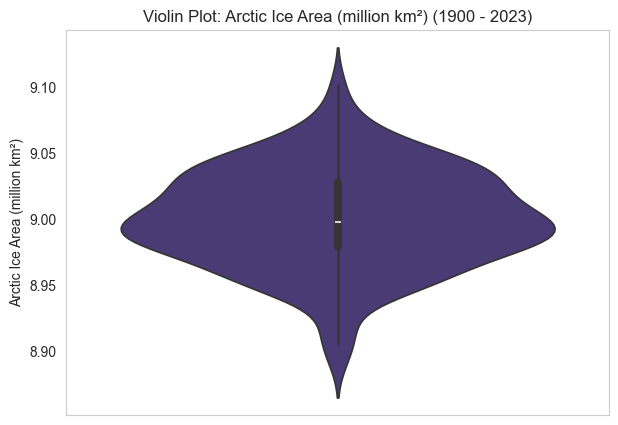

In [21]:
bivariate_violinplot_analysis(aggregated_data,arctic_ice_area)

#### This violin plot shows how much Arctic sea ice area (in million square kilometers) there was from 1900 to 2023. Most of the time, the ice area was around 9 million square kilometers, with some years having a bit more or less. The shape indicates a pretty normal spread around that average, with a few years showing more extreme amounts of ice area.

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

#### For the multivariate analysis of our climate variables—Global Average Temperature (°C), CO₂ Concentration (ppm), Sea Level Rise (mm), and Arctic Ice Area (million km²), we have implemented a comprehensive visualization strategy. Specifically, we created:
- Pair Plots – to examine pairwise relationships between multiple variables simultaneously.
- 3D Scatter Plots – to explore complex interactions and spatial distributions among three variables.
- Heatmaps/Correlation Matrices – to visualize the overall strength and direction of relationships between all variables.
#### Following these visualizations, we conducted a detailed exploratory data analysis (EDA) based on the pictorial representations to extract key insights and multivariate trends.

In [22]:
df_mv = aggregated_data.drop(columns=['Year'])
df_mv

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,14.506663,350.373405,150.408288,8.978659
1,14.485343,349.757140,150.548828,8.947272
2,14.476262,349.299686,152.174821,9.035554
3,14.492360,349.644375,150.138338,9.056501
4,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
119,14.500105,348.642249,151.020415,9.014690
120,14.496937,350.021731,150.219741,9.054254
121,14.501424,350.150302,150.187456,8.968700
122,14.495233,350.493023,148.857646,8.942012


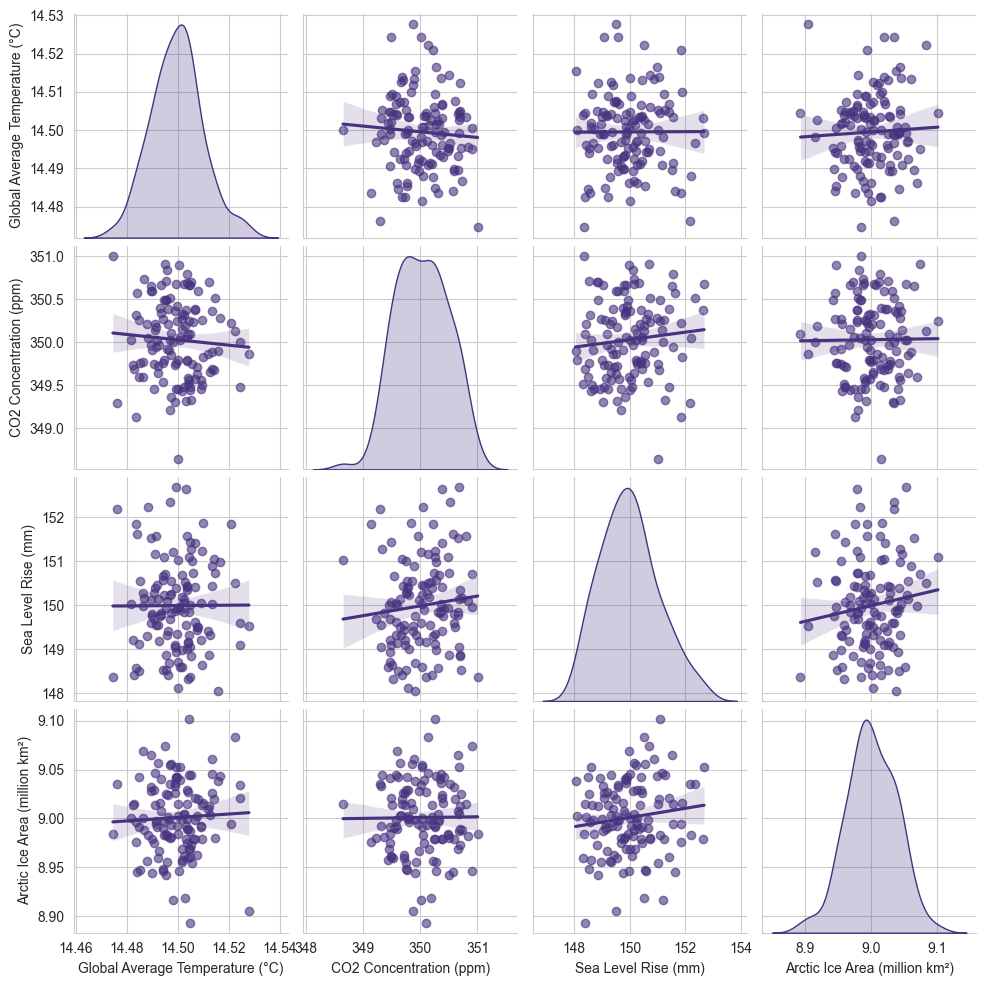

In [23]:
# Pair Plot for multivariate analysis
sns.pairplot(df_mv, kind="reg", diag_kind="kde", markers="o", plot_kws={'scatter_kws': {'alpha': 0.6}})
plt.show()

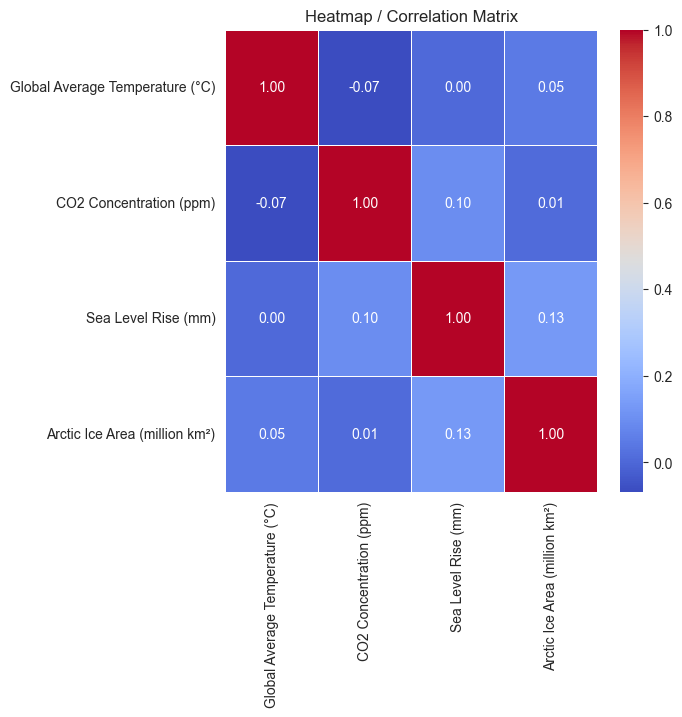

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Global Average Temperature (°C),1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),0.047027,0.009986,0.129528,1.000000


In [24]:
# Heatmap or Correlation matrix

def create_heatmap(df):
	plt.figure(figsize=(6,6))

	corr_matrix = df.corr()

	sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
	plt.title("Heatmap / Correlation Matrix")
	plt.show()

	return corr_matrix

# Drop year from aggregated_data
df_heatmap = aggregated_data.drop(columns=['Year'], errors="ignore")

create_heatmap(df_heatmap)

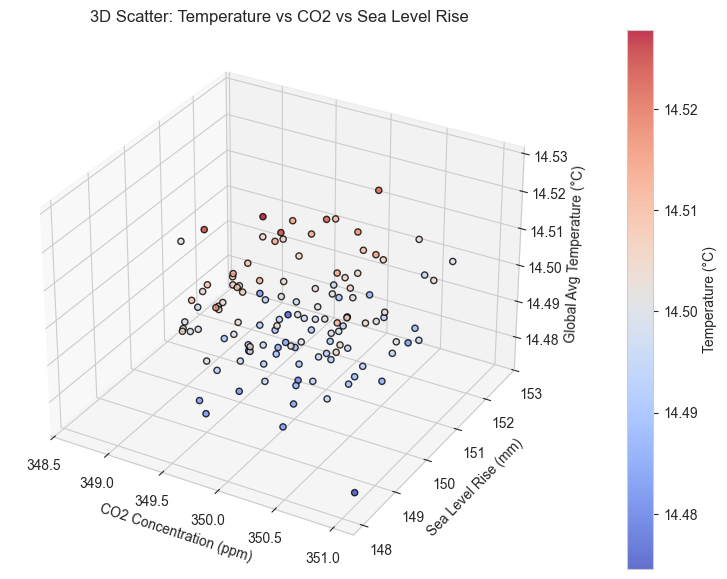

In [25]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(aggregated_data["CO2 Concentration (ppm)"], aggregated_data["Sea Level Rise (mm)"], aggregated_data["Global Average Temperature (°C)"], c=aggregated_data["Global Average Temperature (°C)"], cmap="coolwarm", edgecolor="k", alpha=0.8)

# Labels and title of 3d Plots
ax.set_xlabel("CO2 Concentration (ppm)")
ax.set_ylabel("Sea Level Rise (mm)")
ax.set_zlabel("Global Avg Temperature (°C)")
ax.set_title("3D Scatter: Temperature vs CO2 vs Sea Level Rise")

# For referencing wising different colors
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Temperature (°C)")
plt.show()

## 5. Conclusions and Insights

Our analysis is based on a well-organized dataset (1900–2023) with no missing values or outliers, covering Global Average Temperature (°C), CO₂ Concentration (ppm), Sea Level Rise (mm), and Arctic Ice Area (million km²). The univariate analysis indicates that each variable remains relatively stable over time: global temperature is centered around 14.5°C with slight year-to-year fluctuations, CO₂ concentration clusters around 350 ppm, sea level rise stays between 149–151 mm, and Arctic ice area fluctuates within a narrow range. These findings suggest limited variance and no strong long-term trends within the dataset.

The line plot analysis further supports this, showing only slight fluctuations in each variable over time, without any pronounced upward or downward movement. This suggests that within the observed period, there are no clear long-term increasing or decreasing trends in these climate variables.

However, the bivariate analysis reveals a more complex picture. The heatmap indicates weak correlations between all variable pairs, and scatter as well as regression plots show mostly weak linear relationships—sometimes even counterintuitive (e.g., a weak negative correlation between temperature and CO₂, and a weak positive correlation between sea level rise and Arctic ice area). These unexpected relationships imply that linear models may not fully capture the interactions at play, and that other factors or non-linear dynamics could be influencing these variables.

A similar trend is observed in the multivariate analysis using 3D scatter plots, heatmaps, and Pair plots. These visualizations further confirm the weak correlations between variables and highlight that no strong multivariate patterns emerge from the data. The relationships between multiple variables remain weak, reinforcing the idea that more complex interactions, external climate factors, or non-linear dependencies may exist beyond what is captured in this dataset.

Overall, while the univariate and line plot analyses suggest stability with minor fluctuations, the weak and sometimes surprising bivariate and multivariate correlations highlight the need for further investigation. These results underscore the importance of using advanced analytical techniques to better understand the intricate relationships between climate factors and caution against drawing conclusions about long-term global climate change based solely on this dataset.